# Find a way to differentiate between cropped ROI image and mask image.

**Problem:**

Cropped ROI image and mask image are not consistently named across all patients. Hence, unable to tell if a .dcm file is the cropped ROI image or a mask image just from the filename.

```
Train
|
|- Patient1_RIGHT_CC
|  |- 1-1.dcm
|
|- Patient1_RIGHT_CC_1
|  |- 1-1.dcm <-- cropped ROI image
|  |- 1-2.dcm <-- mask image
|
|- Patient2_RIGHT_CC
|  |- 1-1.dcm
|
|- Patient2_RIGHT_CC_1
|  |- 1-1.dcm <-- mask image
|  |- 1-2.dcm <-- cropped ROI image
|
|...
```

In [1]:
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import cv2
import pydicom
import skimage

import modules.imagePreprocessing as iP

In [2]:
selected_paths = ["../data-strange/Mass-Training_P_00044_RIGHT_CC/07-20-2016-DDSM-79148/1.000000-full mammogram images-44331/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_1/07-21-2016-DDSM-75344/1.000000-ROI mask images-25492/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_1/07-21-2016-DDSM-75344/1.000000-ROI mask images-25492/1-2.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_2/07-21-2016-DDSM-33313/1.000000-ROI mask images-60878/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_2/07-21-2016-DDSM-33313/1.000000-ROI mask images-60878/1-2.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_3/07-21-2016-DDSM-14174/1.000000-ROI mask images-14592/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_3/07-21-2016-DDSM-14174/1.000000-ROI mask images-14592/1-2.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_4/07-21-2016-DDSM-00793/1.000000-ROI mask images-80968/1-1.dcm",
                  "../data-strange/Mass-Training_P_00044_RIGHT_CC_4/07-21-2016-DDSM-00793/1.000000-ROI mask images-80968/1-2.dcm"]

ds1 = pydicom.dcmread(selected_paths[0])
ds2 = pydicom.dcmread(selected_paths[1])
ds3 = pydicom.dcmread(selected_paths[2])
ds4 = pydicom.dcmread(selected_paths[3])
ds5 = pydicom.dcmread(selected_paths[4])
ds6 = pydicom.dcmread(selected_paths[5])
ds7 = pydicom.dcmread(selected_paths[6])
ds8 = pydicom.dcmread(selected_paths[7])
ds9 = pydicom.dcmread(selected_paths[8])

ds = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9]

arr1 = ds1.pixel_array
arr2 = ds2.pixel_array
arr3 = ds3.pixel_array
arr4 = ds4.pixel_array
arr5 = ds5.pixel_array
arr6 = ds6.pixel_array
arr7 = ds7.pixel_array
arr8 = ds8.pixel_array
arr9 = ds9.pixel_array

arr = [arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8, arr9]

## Visualise the problem

Text(0.5, 1.0, 'Mass-Training_P_00044_RIGHT_CC_4\n1-2.dcm')

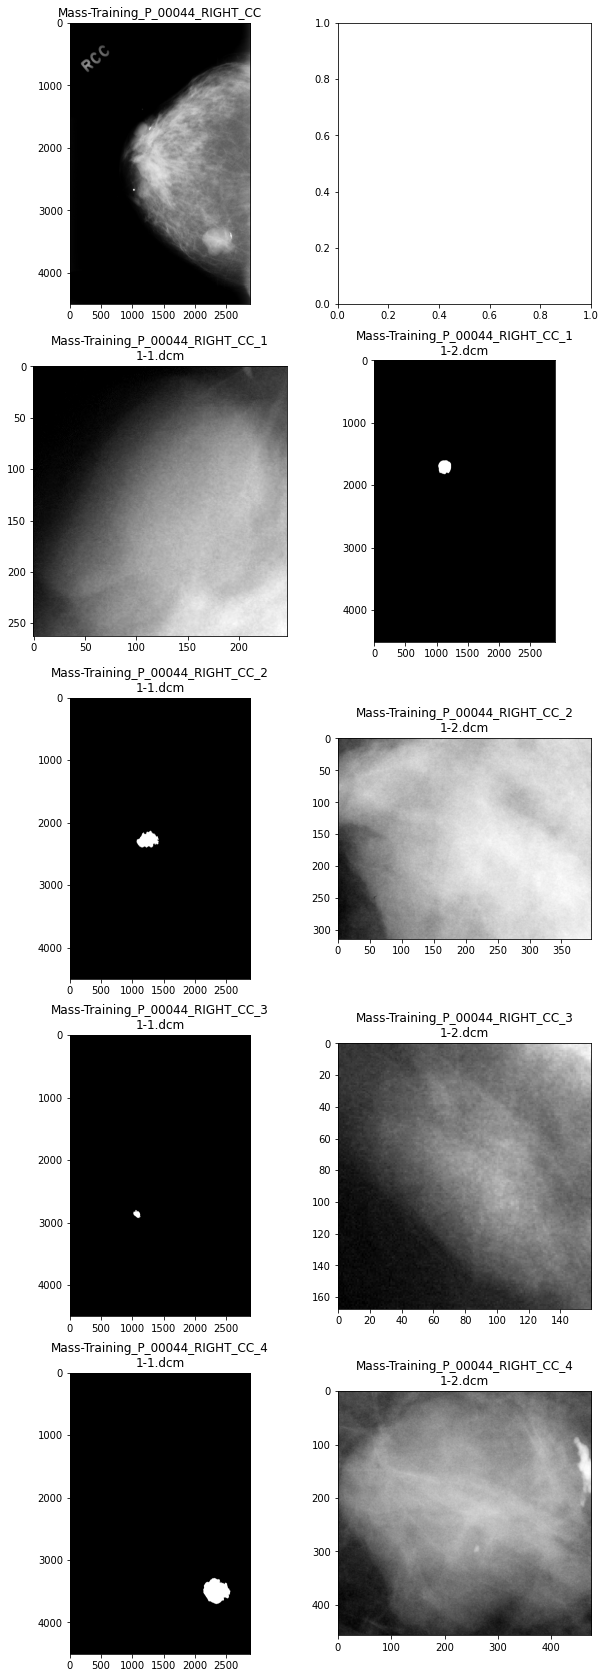

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (10, 30))

# Plot image

ax[0][0].imshow(arr1, cmap="gray")
ax[0][0].set_title(f"{ds1.PatientID}")

ax[1][0].imshow(arr2, cmap="gray")
ax[1][0].set_title(f"{ds2.PatientID}\n1-1.dcm")
ax[1][1].imshow(arr3, cmap="gray")
ax[1][1].set_title(f"{ds3.PatientID}\n1-2.dcm")

ax[2][0].imshow(arr4, cmap="gray")
ax[2][0].set_title(f"{ds4.PatientID}\n1-1.dcm")
ax[2][1].imshow(arr5, cmap="gray")
ax[2][1].set_title(f"{ds5.PatientID}\n1-2.dcm")

ax[3][0].imshow(arr6, cmap="gray")
ax[3][0].set_title(f"{ds6.PatientID}\n1-1.dcm")
ax[3][1].imshow(arr7, cmap="gray")
ax[3][1].set_title(f"{ds7.PatientID}\n1-2.dcm")

ax[4][0].imshow(arr8, cmap="gray")
ax[4][0].set_title(f"{ds8.PatientID}\n1-1.dcm")
ax[4][1].imshow(arr9, cmap="gray")
ax[4][1].set_title(f"{ds9.PatientID}\n1-2.dcm")

    
# plt.tight_layout()
# plt.savefig(fname="../outputs/image-preprocessing/remove-pectoral/original.png", dpi=300)

---

## Proposed Solution 1 - Metadata

Check if there are any metadata in each .dcm that is able to help differentiate

**Conclusion:**
1. `ds.SeriesDescription` tells us whether an image is a full mammogram, cropped ROI or a mask!
    - `ds.SeriesDescription == full mammogram images`
    - `ds.SeriesDescription == cropped images`
    - `ds.SeriesDescription == ROI mask images`
2. Other metadata that are important for identifying the patient and the scan:
    - `ds.PatientID` --> `Mass-Training_P_00044_RIGHT_CC`
    - `ds.Laterality` --> `R` or `L`
    - `ds.PatientOrientation` --> `CC` or `MLO`

In [11]:
# Full
ds1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.12611637613155767303375917101838084313
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.12611637613155767303375917101838084313
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content Dat

In [12]:
# Cropped ROI
ds2

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.356375277113756601337261144492832936332
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.356375277113756601337261144492832936332
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content D

In [13]:
# Mask
ds3

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.354532608313478861237078299312112364063
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.354532608313478861237078299312112364063
(0008, 0020) Study Date                          DA: '20160721'
(0008, 0023) Content D

In [14]:
# Mask
ds4

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.290154078110679709504043114762345073581
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.290154078110679709504043114762345073581
(0008, 0020) Study Date                          DA: '20160721'
(0008, 0023) Content D

In [16]:
# Cropped ROI
ds5

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.240478405713733163340730070273229883770
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.240478405713733163340730070273229883770
(0008, 0020) Study Date                          DA: '20160720'
(0008, 0023) Content D

In [20]:
for d in ds:
    print(f"{d.PatientID} -- {d.Laterality} -- {d.PatientOrientation} -- {d.SeriesDescription}")

Mass-Training_P_00044_RIGHT_CC -- R -- CC -- full mammogram images
Mass-Training_P_00044_RIGHT_CC_1 -- R -- CC -- cropped images
Mass-Training_P_00044_RIGHT_CC_1 -- R -- CC -- ROI mask images
Mass-Training_P_00044_RIGHT_CC_2 -- R -- CC -- ROI mask images
Mass-Training_P_00044_RIGHT_CC_2 -- R -- CC -- cropped images
Mass-Training_P_00044_RIGHT_CC_3 -- R -- CC -- ROI mask images
Mass-Training_P_00044_RIGHT_CC_3 -- R -- CC -- cropped images
Mass-Training_P_00044_RIGHT_CC_4 -- R -- CC -- ROI mask images
Mass-Training_P_00044_RIGHT_CC_4 -- R -- CC -- cropped images
